In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def plot_contours(W,varname='Variable'):

    return

In [3]:
# Physical Parameters
p_infty = 1e5 #->1
gamma = 1.4
R = 287.058 #-> 1
r_infty = 1.
cs_infty = np.sqrt(gamma * p_infty / r_infty)

M_inlet = 0.675

# Boundary Conditions (not necessarily enforced)
cs_inlet = cs_infty
u_inlet = M_inlet * cs_infty
v_inlet = 0.
p_inlet = p_infty
r_inlet = r_infty

cs_outlet = cs_infty
u_outlet = u_inlet # *** not great ***#
v_outlet = 0.
p_outlet = p_infty
r_outlet = r_infty

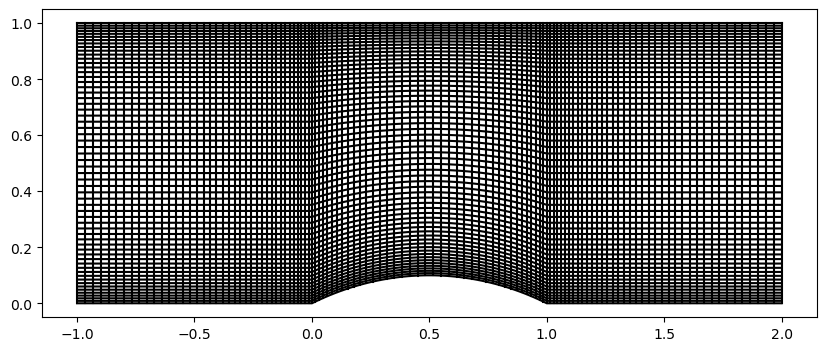

In [4]:
from gridgen import grid_bump

# defining the bump geometry _TODO



# Define the domain: [x0, xend, y0, yend, bump_x0, bump_xn]
domain = [-1, 2, 0., 1., 0, 1]

# Specify the number of grid points
nx1= 40;
nxb= 40;
nx2= 40;
ny = 60;
npoints=[nx1, nxb, nx2, ny]

## Generating the 2D grid ## _TODO

## Plotting the grid ##
fig, ax=plt.subplots(1,1,figsize=(10,4))
plt.plot(X2D,Y2D,color='black');
plt.plot(X2D.T,Y2D.T,color='black');

In [5]:
#x,y of the cell's vertices _TODO


# Cell centers Xc, Yc _TODO

# Calculate the area of each cell using the shoelace formula: Ac _TODO


# Calculating $dx_{ij}$,$dy_{ij}$ _TODO


In [6]:
def initialize_W():
    # W is a list of numpy arrays
    # W[0]=r
    # W[1]=ru
    # W[2]=rv
    # W[3]=rE

    W=[]
    W.append(np.ones_like(Xc)*r_inlet)
    W.append(np.ones_like(Xc)*r_inlet*u_inlet)
    W.append(np.ones_like(Xc)*r_inlet*v_inlet)
    W.append(np.ones_like(Xc)*(p_inlet/(gamma-1.))+r_inlet*(u_inlet**2+v_inlet**2)/2.)

    return W

In [7]:
def primitive_to_conservative(*, primitive): #_TODO
    # Initialize conservative variables
    conservative = [0.0] * 4  #note that a list with single 0 multiplied by 4 gives a list of 4 zeros
    
    # primitive is the primitive variables
    # primitive[0] is r
    # primitive[1] is u
    # primitive[2] is v
    # primitive[3] is p

    # conservative is the conservative variables
    # conservative[0] is r
    # conservative[1] is r*u
    # conservative[2] is r*v
    # conservative[3] is r*E

    
    return conservative

In [8]:
def conservative_to_primitive(*, conservative): #_TODO
    # Initialize primitive variables
    primitive = [0.0] * 4  #note that a list with single 0 multiplied by 4 gives a list of 4 zeros

    # primitive is the primitive variables
    # primitive[0] is r
    # primitive[1] is u
    # primitive[2] is v
    # primitive[3] is p

    # conservative is the conservative variables
    # conservative[0] is r
    # conservative[1] is r*u
    # conservative[2] is r*v
    # conservative[3] is r*E

    
    return primitive

In [9]:
# define a function to calculate a variable at the edges of the cell var_B, var_L, var_R, etc 
# using central interpolation
# only populate the interior points here
def central_scheme(var): #_TODO

    return var_B, var_R, var_T, var_L

# A simple function to apply the central scheme boundary to the variable var_B, var_R, var_T, var_L
# at the boundaries! So it only touches the boundaries
def apply_central_scheme_boundary(var_B, var_R, var_T, var_L): #_TODO

    #This function doesnt need a return because it modifies the variable in place
    # it only touches the boundaries

In [10]:
# Define Fc
def calculate_Fc(r, u, v, p): #_TODO

    return Fc

# Define Gc
def calculate_Gc(r, u, v, p): #_TODO

    return Gc

In [11]:
# Calculate the convective fluxes on the edges
def F_Convective(W): #_TODO
    # Find the primitive variables at the edges of the cell
    # Convert conservative to primitive


    # Calculate the primitive variables on the grid edges _TODO
    r_B, r_R, r_T, r_L = central_scheme(r)
    #_TODO: all variables

    # Calculate at the boundary points
    apply_central_scheme_boundary(r_B, r_R, r_T, r_L)
    #_TODO: all variables

    # Calculating Fc
    Fc_B = calculate_Fc(r_B, u_B, v_B, p_B)
    #_TODO: all variables

    # Calculating Gc
    Gc_B = calculate_Gc(r_B, u_B, v_B, p_B)
    #_TODO: all variables

    # Convective fluxes on the edges
    #_TODO

    # Boundaries
    #
    # Bottom Wall
    # first order wall p
    
    p_B[:,0]=p[:,0]
    Convective_B[0,:,0]=0.
    #_TODO: all rest
    #can you use dpdy_w for a better boundary condition? _TODO

    # Top Wall
    # first order wall p
    p_T[:,-1]=p[:,-1]
    Convective_T[0,:,-1]=0.
    #_TODO: all rest

    # Subsonic Inlet
    # Remember: ()_L is extrapolated from inside the domain, 
    # so u_L[0,:]=u_c[0,:] if we had a simple extrapolation
    cs_L=np.sqrt(gamma*p_L/r_L) # it is excessive because calculating this for the entire domain
    u_west=#_TODO
    v_west=#_TODO
    cs_west=#_TODO
    p_west=#_TODO
    r_west=#_TODO

    # calculate the flux from these variables
    Fc_west #_TODO
    Gc_west #_TODO

    # modify the convective flux to account for the BC
    Convective_L[0,0,:]=#_TODO
    Convective_L[1,0,:]=#_TODO
    Convective_L[2,0,:]=#_TODO
    Convective_L[3,0,:]=#_TODO


    #Subsonic Outlet
    # Remember: ()_R is extrapolated from inside the domain, 
    # so u_R[-1,:]=u_c[-1,:] if we had a simple extrapolation
    cs_R=np.sqrt(gamma*p_R/r_R) # it is excessive because calculating this for the entire domain
    u_east=#_TODO
    v_east=#_TODO
    cs_east=#_TODO
    p_east=#_TODO
    r_east=#_TODO

    # calculate the flux from these variables
    Fc_east #_TODO
    Gc_east #_TODO

    # modify the convective flux to account for the BC
    Convective_R#_TODO
    
    return Convective_B+Convective_R+Convective_T+Convective_L

In [12]:
def Dissipation(W,Ac,dt):    
    return Diss_W

CFL number: 0.1777837739102863
0 0.1552146460230103 0.12395577559097035 0.0142980487413578 0.5927885953784865
1 0.15262370669006056 0.12205365415291437 0.04250605466496561 0.5831607296810979
2 0.1476710934345887 0.11847168787676957 0.06950344730174887 0.5647252660241958
3 0.14081679957153487 0.11364133875535597 0.09445507167431118 0.539132108313865
4 0.13277951382727057 0.10819869699121848 0.11664910645210608 0.5089875416983414
5 0.1243159902346145 0.10278690623660879 0.13553174574658733 0.4770452637518721
6 0.11612065413638518 0.09794547221069486 0.15071691917183735 0.44585981339131886
7 0.10874839724962815 0.09401060411089783 0.16197057787811475 0.4175197593066348
8 0.10261032346510411 0.09112130616584163 0.16920643028928326 0.3936558697591428
9 0.09800303586724189 0.08928737166168071 0.17246765736363678 0.37555057868572317
10 0.09508191037011418 0.08837954340313509 0.17190107810390823 0.3639888584170159
11 0.09388759698701755 0.08819643373768464 0.16780281978170228 0.359285277429563

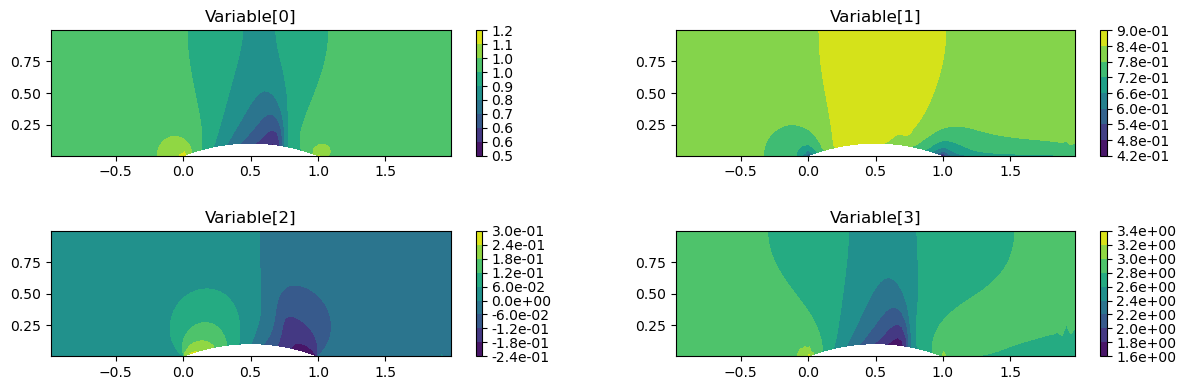

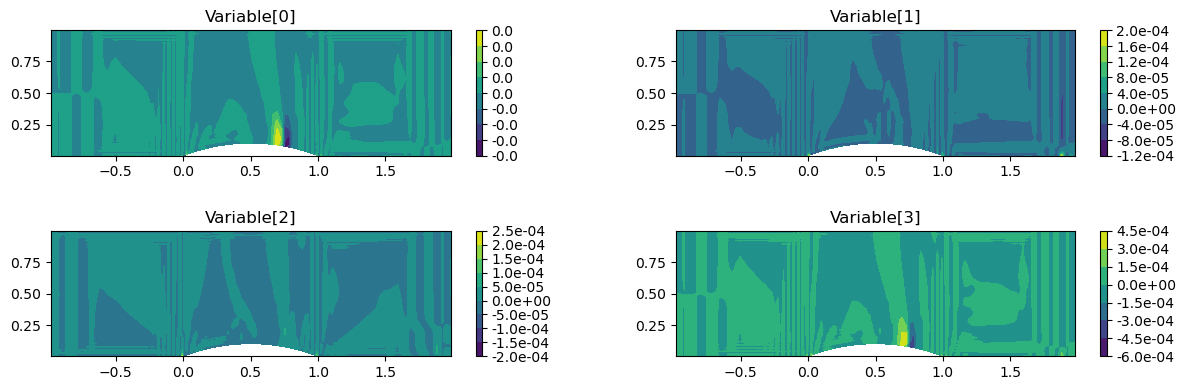

In [13]:
import copy

# Assuming c is the maximum wave speed and dx is the spatial grid size
dt=1.e-3
cfl_number = (u_inlet+cs_inlet) * dt / np.min(np.sqrt(Ac))
print("CFL number:", cfl_number)

W=initialize_W()
for tstep in range(50000):
    # Step 0:
    # W
    

    # Step 1:
   
    # Step 2:
    
    # Step 3:
    

    # Step 4:
    
    
    #print(tstep,np.min(Diss_W),np.max(Diss_W))
    print(tstep,np.linalg.norm(W[0][:,:]-W0[0][:,:]),\
          np.linalg.norm(W[1][:,:]-W0[1][:,:]),\
            np.linalg.norm(W[2][:,:]-W0[2][:,:]),\
                np.linalg.norm(W[3][:,:]-W0[3][:,:]))

#plot the contours
plot_contours(W)
plot_contours(Diss_W)

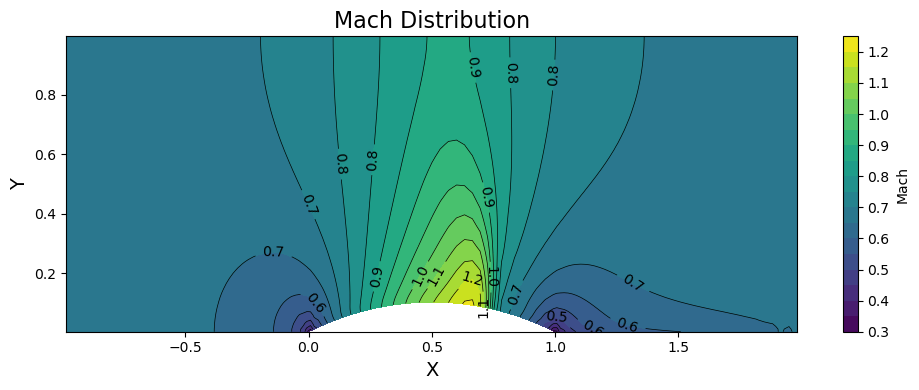

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

q=W[1]/W[0]/np.sqrt(gamma)
#q=W[0]
line=1

# Create the contour plot
contour_plot = ax.contourf(Xc, Yc, q, 20, cmap='viridis')
cbar = fig.colorbar(contour_plot, ax=ax, label='Mach')

if line==1:
    # Add contour lines
    contour_lines = ax.contour(Xc, Yc, q, 20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=10, fmt='%.1f')

# Add labels and title
ax.set_title('Mach Distribution', fontsize=16)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)

# Improve layout
plt.tight_layout()
plt.savefig('Mach_Distribution.pdf')

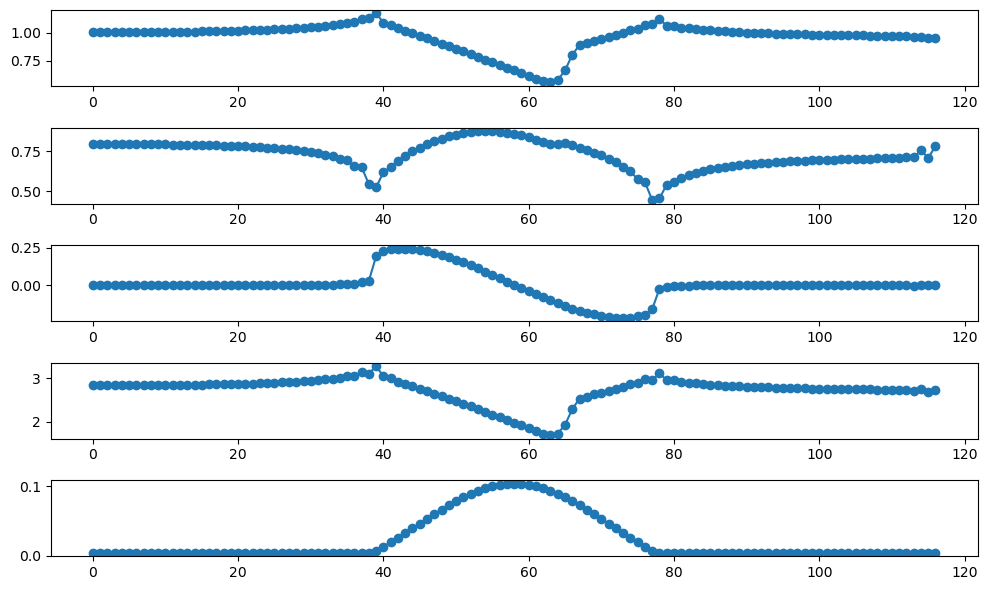

In [19]:
fig,ax=plt.subplots(5,1,figsize=(10,6))
ax[0].plot(W[0][:,0],'-o')
ax[1].plot(W[1][:,0],'-o')
ax[2].plot(W[2][:,0],'-o')
ax[3].plot(W[3][:,0],'-o')
ax[4].plot(Yc[:,0],'-o')
plt.tight_layout()

(-1.0, 2.0)

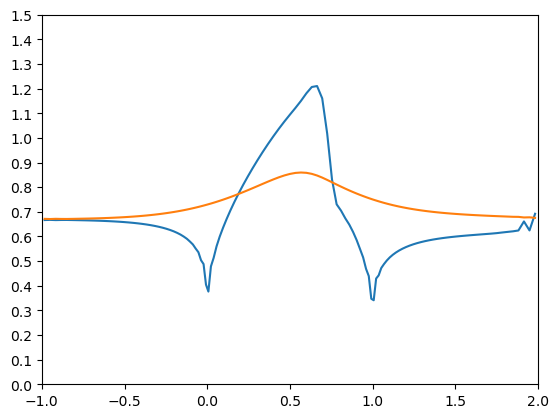

In [26]:
plt.plot(Xc[:,0],W[1][:,0]/W[0][:,0]/np.sqrt(gamma))
plt.plot(Xc[:,-1],W[1][:,-1]/W[0][:,-1]/np.sqrt(gamma))
M_inlet, r_inlet, u_inlet
plt.yticks(np.linspace(0,1.5,16))
plt.xlim([-1,2])

(-1.0, 2.0)

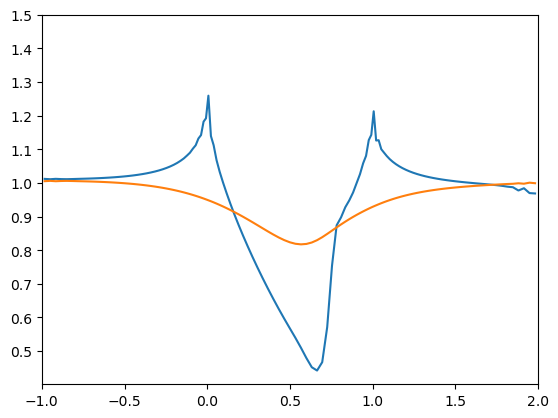

In [27]:
[r,u,v,p]=conservative_to_primitive(conservative=W)
plt.plot(Xc[:,0],p[:,0])
plt.plot(Xc[:,-1],p[:,-1])
M_inlet, r_inlet, u_inlet
plt.yticks(np.linspace(0.5,1.5,11))
plt.xlim([-1,2])